# LOAN PROBABILITY OF DEFAULT


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
import warnings
warnings.filterwarnings('ignore')

## IMPORTING DATASET
<p style='teData_lgdt-align: justify;'>
Immediately after importing the required libraries, the neData_lgdt step is loading the dataset. Generally, the given dataset might include a huge number of entries, it might be very time-consuming to display it as a data frame table and get an insight about included features. A given dataset has total 74 features which includes categorical and numerical features. Before building any machine learning model it is very crucial for the data to be cleaned in an appropriate format. Hence, to collect the basic knowledge about the given dataset and the provided features, using the method "info" makes it much easier. Below, the cell shows how the info method can be applied to a given data frame and what information it provides as a result. </p>

In [3]:
Data        = pd.read_csv(r'loan_data_2007_2014.csv', low_memory = False)
Data_backup = pd.read_csv(r'loan_data_2007_2014.csv', low_memory = False)
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

## FEATURE DESCRIPTION
<p style='teData_lgdt-align: justify;'>
The list of all included featurs with the corresponding descriptions are shown in below talble. </p>

In [4]:
Data_description = pd.read_excel('LCDataDictionary.xlsx')
Data_description ['feature'] = Data_description.iloc[:,0]
Data_description ['Description'] = Data_description.iloc[:,1]
Data_description = Data_description[['feature', 'Description']].dropna()
Data_description.style.set_properties(subset=['Description'], **{'width': '1000px'})

,feature,Description
0,addr_state,The state provided by the borrower in the loan application
1,annual_inc,The self-reported annual income provided by the borrower during registration.
2,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
3,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
4,collection_recovery_fee,post charge off collection fee
5,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
6,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
7,desc,Loan description provided by the borrower
8,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
9,dti_joint,"A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income"


# LGD (Definition of LGD)
<p style='teData_lgdt-align: justify;'>
In what follows, weintroduces models for loss given default (LGD) and recovery estimation. It worth to note that a loss arises only in the event of default and is conditional on the default event; hence it is called loss given default.</p>

<p style='teData_lgdt-align: justify;'>
LGDs are commonly eData_lgdpressed as a ratio and related to the outstanding amount or eData_lgdposure at default (EAD). In other words, LGD is essentially a loss rate given default. The recovery rate is then 1 − LGD. </p>

<p style='teData_lgdt-align: justify;'>
In order to unambiguously quantify the loss given default, you first need to have
a well-framed definition of default. For a thorough discussion, see Van Gestel and
Baesens (2009). For non-retail eData_lgdposures, rating agencies such as Moody’s, Standard
& Poor’s (S&P), and Fitch use definitions of default that, although to a large eData_lgdtent
overlapping, are not identical. Hence, if you use different definitions of default, then
of course you cannot compare the resulting default and loss rates. More specifically,
there is a direct interrelation between the default definition, the default rates, and
the loss or LGD values. Hence, when LGD rates are reported, it is always important
to ask for the default definition adopted, to make sure you can correctly interpret and
benchmark them.</p>

<p style='teData_lgdt-align: justify;'>
Usually, a bank will distinguish among different types of defaults. An operational
default is due to technical issues on the obligor side. For eData_lgdample, an obligor is acci-
dentally late when making the payment. A technical default is a default due to an
internal information system issue. For eData_lgdample, the payment was made on time,
but on the wrong account. A real default is a default due to financial problems or
insolvency. These are the defaults we are interested in when modeling LGD.
In case of default, various actions can take place. First, there can be a cure. This
means a defaulter will pay back all outstanding debt and return to a performing
or thus nondefaulter status with no accompanying loss. There could also be a
restructuring or settlement, whereby the bank and the defaulter work out a recovery
or repayment plan. The latter could, for eData_lgdample, result in an eData_lgdtension of the loan
maturity to reduce the monthly installment amount. This usually comes with a
medium loss. Finally, there could also be liquidation, repossession, or foreclosure,
which implies that the bank takes full possession of the collateral asset, if available,
and sells it by starting up a bankruptcy procedure. Depending upon the value of the
collateral, this may come with a high loss.</p>

<p style='teData_lgdt-align: justify;'>
When modeling LGD, it is of key importance that the default definition used
is the same as for PD because PD and the LGD will be combined to calculate both
eData_lgdpected and uneData_lgdpected loss. Note that changing the default definition simultane-
ously impacts both the PD and the LGD. If you would, for eData_lgdample, relaData_lgd the default
definition from 90 days to 60 days in payment arrears, then the default rates and PD
may increase, but the loss rates and LGD may decrease. Hence, the combined effect
in terms of eData_lgdpected loss stays relatively constant.</p>

<p style='teData_lgdt-align: justify;'>
Cures are those defaulters that become nondefaulters and return to performing
by repaying all outstanding debt. The corresponding LGD will thus be zero, or close to
zero. As already mentioned, note that this depends on the default definition. RelaData_lgding
the definition of a default, for eData_lgdample from 90 to 60 days, will typically increase the
number of cures. In case of multiple defaults, you could opt to include only the last
default event and also relate the PD and EAD to this.</p>


<p style='teData_lgdt-align: justify;'>
The loss given default can now be defined as the ratio of the loss on an eData_lgdposure due
to the default of an obligor to the amount outstanding at default. As such, it is the
complement of the recovery rate or, in other words, LGD equals 1 minus the recov-
ery rate. Important to note here is that LGD focuses on economic loss, rather than
accounting loss. Hence, all costs, but potentially also benefits, need to be properly taken into account when defining the LGD. EData_lgdample costs are: the costs for realizing
the collateral value, administrative costs incurred by sending collection letters or mak-
ing telephone calls with the defaulted obligor, legal costs, and time delays in what is
recovered. Also, benefits such as interest on arrears, penalties for delays, or other
commissions can be considered.</p>
    
<p style='teData_lgdt-align: justify;'>    
LGD can be measured using various methods such as the workout method used
for both corporate and retail eData_lgdposures, the market approach used for corporate eData_lgdpo-
sures, the implied historical LGD approach used for retail eData_lgdposures, and the implied
market approach used for corporate eData_lgdposures. In what follows, we will discuss each
of these in more detail.</p>

<p style='teData_lgdt-align: justify;'>
The most popular method for defining LGD is the workout method, which is
frequently adopted for both corporate and retail eData_lgdposures. The idea here is to work
out the collection process of a defaulted eData_lgdposure and carefully inspect the incoming
and outgoing cash flows. Both direct and indirect cash flows should be considered.
EData_lgdample indirect costs could be the operating costs of the workout department. These
cash flows should then be discounted to the moment of default to calculate the loss.
In EData_lgdhibit 10.2 you can see a simplified eData_lgdample.</p>

<p style='teData_lgdt-align: justify;'>
Let us assume an eData_lgdposure goes into default with an EAD of \$100. Soon after
default, the collection department will contact the defaulted obligor either by tele-
phone or by sending a collection letter. Let us assume the cost for this equals $5.
This is followed by the obligor paying back \$20, which is clearly not enough to cover
all outstanding debt. So, the collection department contacts the obligor again at a
cost of \$5. Let us say that the obligor does not react, so the bank decides to mate-
rialize the collateral and receives \$70 for it. We can now discount all these cash
flows back to the moment of default using a discount factor, which we leave unspec-
ified for the moment. Let us say that the discounted amount equals \$70. Note that
this is smaller than the sum of the four numbers, which equals \$80, because of the
discounting that has been applied. In other words, this means that \$70 has been
recovered from the \$100 EAD, hereby giving a recovery rate of 70 percent and an LGD
of 30 percent. </p>

<p style='teData_lgdt-align: justify;'>
Finally, according to the Basel Capital Accord, the definition of loss used in esti-
mating LGD is economic loss. As already stated, this means that every cash flow
or cost related to the default should be properly taken into account.</p>

<p style='teData_lgdt-align: justify;'>
In a second stage, after the observed LGDs have been computed, a bank is generally
interested in modeling the determinants of LGD (such as values of collaterals) and
provide LGD forecasts before a default has happened, but also after a default. The
remainder of this chapter details several variants of regression-type models that can
be applied by a bank for modeling and forecasting LGD. The data set we use originates
from a European bank and contains workout LGDs from mortgage loans that have
been accordingly anonymized and preprocessed. The models can, however, also be
applied to other LGD definitions, such as market LGDs.</p>

<p style='teData_lgdt-align: justify;'>
Throughout the teData_lgdt we define LGD as a fraction and the recovery rate as
(1 − LGD). Similar to PD models, the range of values for LGD requires specific
models and considerations. First, LGD usually ranges between zero and one [0; 1],
and values below zero or greater than one only rarely occur (or do not occur at all;
see previous discussion). Second, special cases are values of eData_lgdactly zero or eData_lgdactly
one, which indicate a zero loss or a total loss, respectively. A zero loss can occur
when a default is fully cured. Third, LGDs by definition are conditional quantities
and can be observed only if a default has happened. This imposes a sample selection
problem when defaults and LGDs are dependent, which should be accounted for in
order to avoid inconsistent parameter estimates.</p>


<p style='teData_lgdt-align: justify;'>
For the LGD and EAD models, we just need to considere those borrowers which had time to repay part of thier debts. In our dataset, these borrowers has recorded as "charged off" and "Does not meat credit policy". Hence, in the following we will eData_lgdtract these columns and a new working materials as below. </p>

In [5]:
Data_lgd = Data_backup[Data_backup['loan_status'].isin(\
                                      ['Charged Off','Does not meet the credit policy. Status:Charged Off'])]

In [6]:
Data_lgd['mths_since_last_record'].fillna(Data_lgd['mths_since_last_record'].mean(), inplace=True)
Data_lgd['mths_since_last_delinq'].fillna(Data_lgd['mths_since_last_delinq'].mean(), inplace = True)

In [7]:
Data_lgd['recovery_rate'] = Data_lgd['recoveries'] / Data_lgd['funded_amnt']

In [8]:
Data_lgd['recovery_rate'].fillna(Data_lgd['recovery_rate'].mean(), inplace=True)
Data_lgd['recovery_rate'].isnull().mean()

0.0

In [9]:
def trnsfrmr(Data_lgd, c, d):
    a = Data_lgd.min()
    b = Data_lgd.max()
    Data_lgd = ((Data_lgd-a)*(d-c))/(b-a) + c
    return Data_lgd

<AxesSubplot:xlabel='recovery_rate', ylabel='Probability'>

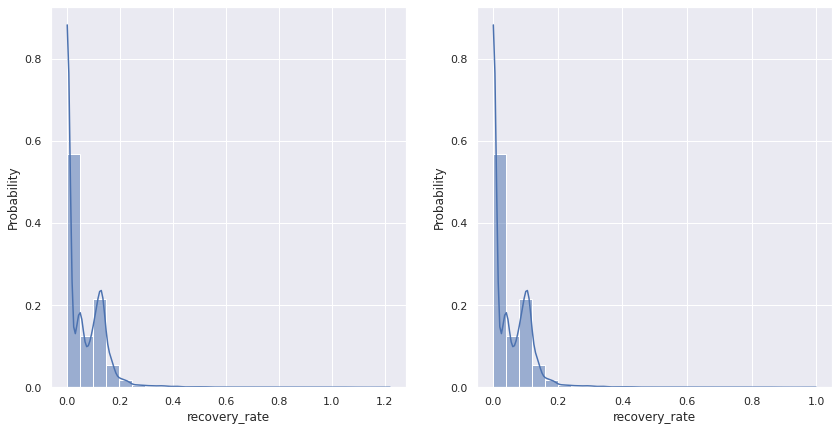

In [10]:
fig , (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = ((14,7)))
sns.histplot(Data_lgd['recovery_rate'], stat = 'probability', kde = True, bins = 25, ax = ax1)
Data_lgd['recovery_rate'] = trnsfrmr(Data_lgd['recovery_rate'], 0, 1)
sns.histplot(Data_lgd['recovery_rate'] , stat = 'probability', kde = True, bins = 25)

In [11]:
Data_lgd['recovery_rate'] = np.where( Data_lgd['recovery_rate'] == 0, 0, 1)

## RECOVERY RATE TREATEMENT

<p style='teData_lgdt-align: justify;'>
Typically, any real-life LGD data set will contain negative LGDs and LGDs eData_lgdceeding
100 percent. An obvious question is: Where do these eData_lgdtreme values come from and
how should they be treated? A negative LGD is the same as a recovery rate eData_lgdceeding
100 percent. There could be various reasons for this. One eData_lgdample is that the EAD was measured at the time of default, and the claim on the borrower increased after
that because of fines or fees, and everything was recovered. In other words, the
amount recovered was higher than the EAD, thereby giving a recovery rate of higher
than 100 percent or a negative LGD. Another reason for a negative LGD could be
a gain in collateral sales. Negative LGDs should be capped at zero. For eData_lgdample, the
PRA eData_lgdpects firms to ensure that no LGD estimate is less than zero. Vice versa, LGDs
eData_lgdceeding 100 percent correspond to negative recovery rates. Also here, there could
be various reasons for this, such as additional recovery costs were incurred and noth-
ing was recovered. Alternatively, it could have been that additional drawings after
default were considered as LGD, thereby seriously increasing the costs. Also here, it is
recommended to cap such LGDs at 100 percent. The models that we will present later
in this chapter provide ways of dealing with this sort of truncation and censoring.</P>

In [12]:
#droppng of irrelevant columns and rows with missing values
columns_to_drop = ['id', 'member_id', 'sub_grade', 'emp_title', 'url', 'desc', 'title', 'zip_code', 'next_pymnt_d',
                   'recoveries', 'collection_recovery_fee', 'total_rec_prncp', 'total_rec_late_fee', 'desc', 'mths_since_last_record',
                   'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m',
                   'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m',
                   'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m','policy_code',]
Data_lgd.drop(columns = columns_to_drop, inplace = True, axis = 1)
Data_lgd

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,recovery_rate
1,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,...,Apr-13,119.66,Sep-13,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1
8,5600,5600,5600.0,60 months,21.28,152.39,F,4 years,OWN,40000.0,...,Apr-12,152.39,Aug-12,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1
9,5375,5375,5350.0,60 months,12.69,121.45,B,< 1 year,RENT,15000.0,...,Nov-12,121.45,Mar-13,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1
12,9000,9000,9000.0,36 months,13.49,305.38,C,< 1 year,RENT,30000.0,...,Jul-12,305.38,Nov-12,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1
14,10000,10000,10000.0,36 months,10.65,325.74,B,3 years,RENT,100000.0,...,Oct-13,325.74,Mar-14,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466254,6000,6000,6000.0,60 months,23.40,170.53,E,NaN,MORTGAGE,45600.0,...,Apr-14,170.53,Jan-16,0.0,INDIVIDUAL,0.0,0.0,1199.0,8200.0,0
466256,15000,15000,15000.0,36 months,16.99,534.72,D,NaN,RENT,50000.0,...,Nov-14,534.72,Jan-16,0.0,INDIVIDUAL,0.0,0.0,34157.0,29300.0,0
466276,8525,8525,8525.0,60 months,18.25,217.65,D,5 years,MORTGAGE,37536.0,...,May-14,217.65,Oct-14,0.0,INDIVIDUAL,0.0,0.0,116995.0,49800.0,1
466277,18000,18000,17975.0,36 months,7.90,563.23,A,3 years,RENT,90000.0,...,Nov-14,563.23,Oct-14,0.0,INDIVIDUAL,0.0,0.0,42592.0,50300.0,0


In [13]:
def remover(Data, criteria = 20):
    for feature in Data.columns.tolist():
        characterstic = Data[feature].isnull().mean()*100
        if characterstic > criteria:
            Data.drop(columns = feature, inplace = True)    
    return Data      

In [14]:
# To check how many of columns are gone
print(Data_lgd.shape)
Data_lgd = remover(Data_lgd)
print(Data_lgd.shape)

(43236, 42)
(43236, 39)


In [15]:
# The independent variable emp_length_int is given in the form which is not useful. In order to make it useful
# we have to remore extra parts and then convert it into numeric value. Below lines of the code are doing it.
Data_lgd['emp_length'] = Data_lgd['emp_length'].str.replace(    '\+ years', '',    regex=True)
Data_lgd['emp_length'] = Data_lgd['emp_length'].str.replace('< 1 year', str(0),regex=True)
Data_lgd['emp_length'] = Data_lgd['emp_length'].str.replace('n/a',  str(0)    ,regex=True)
Data_lgd['emp_length'] = Data_lgd['emp_length'].str.replace(' years', ''      ,regex=True)
Data_lgd['emp_length'] = Data_lgd['emp_length'].str.replace(' year', ''       ,regex=True)
Data_lgd['emp_length'] = pd.to_numeric(Data_lgd['emp_length'])
Data_lgd.drop(columns  = ['emp_length'], inplace = True)

In [16]:
# converting term column to numeric data type
def term_numeric(df, column):
    df[column] = pd.to_numeric(df[column].str.replace(' months', ''))
    
term_numeric(Data_lgd, 'term')
Data_lgd['term_int'] = Data_lgd['term']
Data_lgd.drop('term', axis = 1, inplace = True)

In [17]:
# preprocessing date columns 
def date_columns(df, column):
    # store current month
    today_date = pd.to_datetime('today')
    # convert to datetime format
    df[column] = pd.to_datetime(df[column], format = "%b-%y")
    # calculate the difference in months and add to a new column
    df['mths_since_' + column] = round(pd.to_numeric((today_date - df[column]) / np.timedelta64(1, 'M')))
    # make any resulting -ve values to be equal to the max date
    df['mths_since_' + column] = df['mths_since_' + column].apply(lambda x: df['mths_since_' + column].max() if x < 0 else x)
    # drop the original date column
    df.drop(columns = [column], inplace = True)


In [18]:
date_columns(Data_lgd, 'issue_d')
date_columns(Data_lgd, 'last_pymnt_d')
date_columns(Data_lgd, 'last_credit_pull_d')
date_columns(Data_lgd, 'earliest_cr_line')

In [19]:
# checking for missing values percentage  
missing_values = Data_lgd.isnull().sum()
missing_values[missing_values>0]/len(Data)

delinq_2yrs                      0.000006
inq_last_6mths                   0.000006
open_acc                         0.000006
pub_rec                          0.000006
revol_util                       0.000114
total_acc                        0.000006
collections_12_mths_ex_med       0.000060
acc_now_delinq                   0.000006
mths_since_last_pymnt_d          0.000806
mths_since_last_credit_pull_d    0.000013
mths_since_earliest_cr_line      0.000006
dtype: float64

In [20]:
Data_lgd

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,...,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,recovery_rate,term_int,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d,mths_since_earliest_cr_line
1,2500,2500,2500.0,15.27,59.83,C,RENT,30000.0,Source Verified,Charged Off,...,119.66,0.0,INDIVIDUAL,0.0,1,60,117.0,101.0,96.0,269.0
8,5600,5600,5600.0,21.28,152.39,F,OWN,40000.0,Source Verified,Charged Off,...,152.39,0.0,INDIVIDUAL,0.0,1,60,117.0,113.0,109.0,209.0
9,5375,5375,5350.0,12.69,121.45,B,RENT,15000.0,Verified,Charged Off,...,121.45,0.0,INDIVIDUAL,0.0,1,60,117.0,106.0,102.0,204.0
12,9000,9000,9000.0,13.49,305.38,C,RENT,30000.0,Source Verified,Charged Off,...,305.38,0.0,INDIVIDUAL,0.0,1,36,117.0,110.0,106.0,209.0
14,10000,10000,10000.0,10.65,325.74,B,RENT,100000.0,Source Verified,Charged Off,...,325.74,0.0,INDIVIDUAL,0.0,1,36,117.0,95.0,90.0,364.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466254,6000,6000,6000.0,23.40,170.53,E,MORTGAGE,45600.0,Source Verified,Charged Off,...,170.53,0.0,INDIVIDUAL,0.0,0,60,92.0,89.0,68.0,452.0
466256,15000,15000,15000.0,16.99,534.72,D,RENT,50000.0,Source Verified,Charged Off,...,534.72,0.0,INDIVIDUAL,0.0,0,36,92.0,82.0,68.0,245.0
466276,8525,8525,8525.0,18.25,217.65,D,MORTGAGE,37536.0,Verified,Charged Off,...,217.65,0.0,INDIVIDUAL,0.0,1,60,92.0,88.0,83.0,322.0
466277,18000,18000,17975.0,7.90,563.23,A,RENT,90000.0,Verified,Charged Off,...,563.23,0.0,INDIVIDUAL,0.0,0,36,92.0,82.0,83.0,278.0


In [21]:
# Here we are going to impute the annual income with it's mean value. Since above graph shows, anual income of the
# most of the borrower are localized around zero (consider the scale), it is not reasonable to impute with its mean
# value. However, here, for the sake of the simplicity we will do it. 
Data_lgd['annual_inc'].fillna(Data_lgd['annual_inc'].mean(), inplace=True)

# Below lines of the code, imputing the damaged variables. However, in a realistic case we have to be very careful
# according the imputation because it highly likely it will affects the quality of the results. I have to mention 
# that I did the simplest job. Above mentioned situation might be valid here as well.
Data_lgd['acc_now_delinq'].fillna(Data_lgd['acc_now_delinq'].mean(), inplace=True)
Data_lgd['total_acc'].fillna(Data_lgd['total_acc'].mean(), inplace=True)
Data_lgd['pub_rec'].fillna(Data_lgd['pub_rec'].mean(), inplace=True)
Data_lgd['open_acc'].fillna(Data_lgd['open_acc'].mean(), inplace=True)
Data_lgd['inq_last_6mths'].fillna(Data_lgd['inq_last_6mths'].mean(), inplace=True)
Data_lgd['delinq_2yrs'].fillna(Data_lgd['delinq_2yrs'].mean(), inplace=True)
Data_lgd['collections_12_mths_ex_med'].fillna(Data_lgd['collections_12_mths_ex_med'].mean(), inplace=True)
Data_lgd['revol_util'].fillna(Data_lgd['revol_util'].mean(), inplace=True)
Data_lgd['mths_since_last_pymnt_d'].fillna(Data_lgd['mths_since_last_pymnt_d'].mean(), inplace=True)
Data_lgd['mths_since_last_credit_pull_d'].fillna(Data_lgd['mths_since_last_credit_pull_d'].mean(), inplace=True)
Data_lgd['mths_since_earliest_cr_line'].fillna(Data_lgd['mths_since_earliest_cr_line'].mean(), inplace=True)
Data_lgd

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,...,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,recovery_rate,term_int,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d,mths_since_earliest_cr_line
1,2500,2500,2500.0,15.27,59.83,C,RENT,30000.0,Source Verified,Charged Off,...,119.66,0.0,INDIVIDUAL,0.0,1,60,117.0,101.0,96.0,269.0
8,5600,5600,5600.0,21.28,152.39,F,OWN,40000.0,Source Verified,Charged Off,...,152.39,0.0,INDIVIDUAL,0.0,1,60,117.0,113.0,109.0,209.0
9,5375,5375,5350.0,12.69,121.45,B,RENT,15000.0,Verified,Charged Off,...,121.45,0.0,INDIVIDUAL,0.0,1,60,117.0,106.0,102.0,204.0
12,9000,9000,9000.0,13.49,305.38,C,RENT,30000.0,Source Verified,Charged Off,...,305.38,0.0,INDIVIDUAL,0.0,1,36,117.0,110.0,106.0,209.0
14,10000,10000,10000.0,10.65,325.74,B,RENT,100000.0,Source Verified,Charged Off,...,325.74,0.0,INDIVIDUAL,0.0,1,36,117.0,95.0,90.0,364.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466254,6000,6000,6000.0,23.40,170.53,E,MORTGAGE,45600.0,Source Verified,Charged Off,...,170.53,0.0,INDIVIDUAL,0.0,0,60,92.0,89.0,68.0,452.0
466256,15000,15000,15000.0,16.99,534.72,D,RENT,50000.0,Source Verified,Charged Off,...,534.72,0.0,INDIVIDUAL,0.0,0,36,92.0,82.0,68.0,245.0
466276,8525,8525,8525.0,18.25,217.65,D,MORTGAGE,37536.0,Verified,Charged Off,...,217.65,0.0,INDIVIDUAL,0.0,1,60,92.0,88.0,83.0,322.0
466277,18000,18000,17975.0,7.90,563.23,A,RENT,90000.0,Verified,Charged Off,...,563.23,0.0,INDIVIDUAL,0.0,0,36,92.0,82.0,83.0,278.0


In [22]:
categorical_features_lgd = Data_lgd.select_dtypes(exclude = 'number')
categorical_features_lgd = pd.concat([categorical_features_lgd, Data_lgd['recovery_rate']] , axis = 1)
categorical_features_lgd

,grade,home_ownership,verification_status,loan_status,pymnt_plan,purpose,addr_state,initial_list_status,application_type,recovery_rate
1,C,RENT,Source Verified,Charged Off,n,car,GA,f,INDIVIDUAL,1
8,F,OWN,Source Verified,Charged Off,n,small_business,CA,f,INDIVIDUAL,1
9,B,RENT,Verified,Charged Off,n,other,TX,f,INDIVIDUAL,1
12,C,RENT,Source Verified,Charged Off,n,debt_consolidation,VA,f,INDIVIDUAL,1
14,B,RENT,Source Verified,Charged Off,n,other,CA,f,INDIVIDUAL,1
...,...,...,...,...,...,...,...,...,...,...
466254,E,MORTGAGE,Source Verified,Charged Off,n,medical,GA,f,INDIVIDUAL,0
466256,D,RENT,Source Verified,Charged Off,n,debt_consolidation,PA,f,INDIVIDUAL,0
466276,D,MORTGAGE,Verified,Charged Off,n,medical,MA,f,INDIVIDUAL,1
466277,A,RENT,Verified,Charged Off,n,debt_consolidation,MD,f,INDIVIDUAL,0


In [23]:
numerical_features_lgd   = Data_lgd.select_dtypes(exclude = 'object')
numerical_features_lgd = pd.concat([numerical_features_lgd, Data_lgd['recovery_rate']] , axis = 1)
numerical_features_lgd

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,recovery_rate,term_int,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d,mths_since_earliest_cr_line,recovery_rate
1,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,34.105413,...,119.66,0.0,0.0,1,60,117.0,101.0,96.0,269.0,1
8,5600,5600,5600.0,21.28,152.39,40000.0,5.55,0.0,2.0,34.105413,...,152.39,0.0,0.0,1,60,117.0,113.0,109.0,209.0,1
9,5375,5375,5350.0,12.69,121.45,15000.0,18.08,0.0,0.0,34.105413,...,121.45,0.0,0.0,1,60,117.0,106.0,102.0,204.0,1
12,9000,9000,9000.0,13.49,305.38,30000.0,10.08,0.0,1.0,34.105413,...,305.38,0.0,0.0,1,36,117.0,110.0,106.0,209.0,1
14,10000,10000,10000.0,10.65,325.74,100000.0,7.06,0.0,2.0,34.105413,...,325.74,0.0,0.0,1,36,117.0,95.0,90.0,364.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466254,6000,6000,6000.0,23.40,170.53,45600.0,1.50,1.0,0.0,15.000000,...,170.53,0.0,0.0,0,60,92.0,89.0,68.0,452.0,0
466256,15000,15000,15000.0,16.99,534.72,50000.0,24.39,0.0,0.0,34.105413,...,534.72,0.0,0.0,0,36,92.0,82.0,68.0,245.0,0
466276,8525,8525,8525.0,18.25,217.65,37536.0,12.28,4.0,0.0,3.000000,...,217.65,0.0,0.0,1,60,92.0,88.0,83.0,322.0,1
466277,18000,18000,17975.0,7.90,563.23,90000.0,10.33,1.0,0.0,14.000000,...,563.23,0.0,0.0,0,36,92.0,82.0,83.0,278.0,0


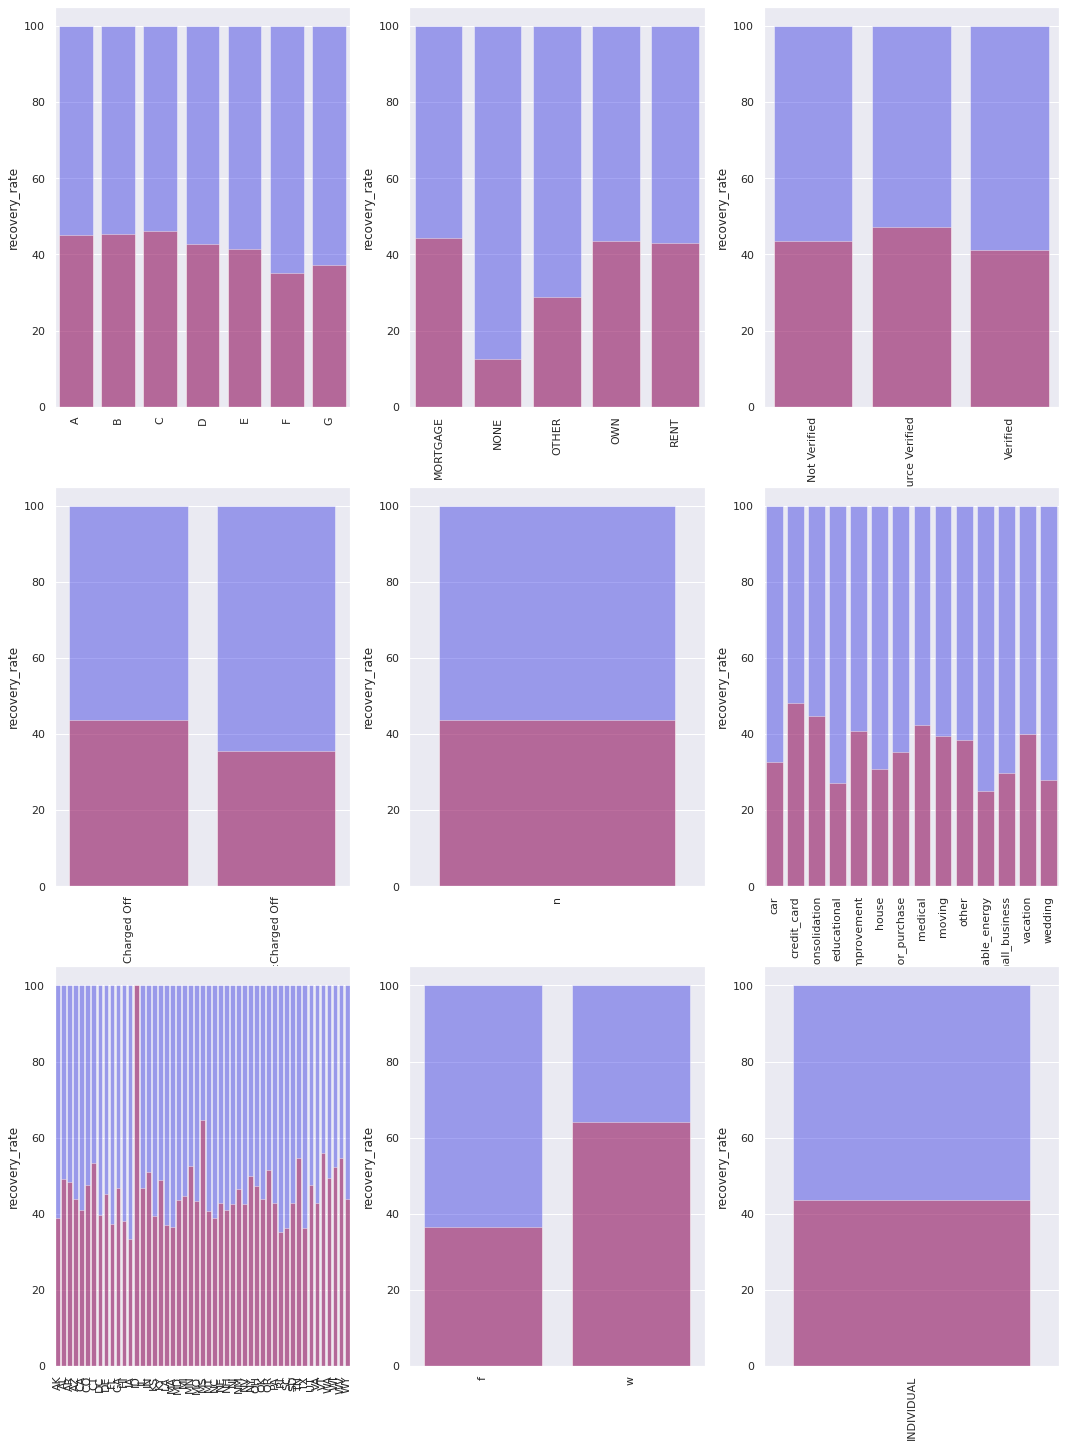

In [24]:
fig , axes = plt.subplots(nrows = 4, ncols = 3, figsize = ((18,25)))
angel = 90
count = 1
for i in range(3):
    for j in range(3):
        if (count <= len(categorical_features_lgd.columns.tolist())):
            feature = categorical_features_lgd.columns.tolist()[count-1]
            plt.subplot(3,3, count)
            sns.barplot(x = sorted(categorical_features_lgd[feature].unique()) , \
                    y = [100]*len(categorical_features_lgd[feature].unique().tolist()), color = 'blue', alpha = 0.4)
            sns.barplot(x = sorted(categorical_features_lgd[feature].unique()) , \
                    y = (1 - Data_lgd.groupby(feature)["recovery_rate"].sum()\
                       /Data_lgd.groupby(feature)["recovery_rate"].count()\
                        )*100, color = 'red', alpha = 0.4)
            count = count + 1
            locs, labels = plt.xticks()
            plt.setp(labels, rotation = 90)
        else:
            pass
            plt.tight_layout()        
            plt.show()

In [25]:
# function to calculate woe of categorical features

def woe_categorical_lgd(df, cat_feature, good_bad_df, label_angel):
    fig , ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = ((15,10)))
    ax2 = ax1.twinx()
    #print([100]*len(df[cat_feature].unique().tolist()))
    #print(df[cat_feature].unique().tolist())
    sns.barplot(ax = ax1, x = df[cat_feature].unique().tolist(), y = [100]*len(df[cat_feature].unique().tolist()),\
                               color = 'blue', alpha = 0.3)
    sns.barplot(ax = ax1, x =  df[cat_feature].unique().tolist(),\
                y = (1- df.groupby(cat_feature)["recovery_rate"].sum()/df.groupby(cat_feature)["recovery_rate"].count())*100,\
                color = 'red', alpha = 0.3)
     
    df = pd.concat([df[cat_feature], good_bad_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    
    sns.lineplot(ax = ax2, x = np.array(df.iloc[:, 0].apply(str)), y = df['WoE'], markers = 'o', \
                linewidth = 3, markersize = 14 )
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=45)
    return df

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,C,12069,0.538570,0.279142,6500.0,5569.0,0.266710,0.295203,-0.101499,NaN,NaN
1,B,9242,0.546527,0.213757,5051.0,4191.0,0.207255,0.222157,-0.069439,0.007957,0.032060
2,A,2535,0.549901,0.058632,1394.0,1141.0,0.057199,0.060482,-0.055813,0.003375,0.013625
3,D,9945,0.571443,0.230017,5683.0,4262.0,0.233187,0.225921,0.031655,0.021542,0.087468
4,E,5868,0.585719,0.135720,3437.0,2431.0,0.141028,0.128863,0.090211,0.014276,0.058556
5,G,799,0.628285,0.018480,502.0,297.0,0.020598,0.015743,0.268782,0.042566,0.178572
6,F,2778,0.649388,0.064252,1804.0,974.0,0.074022,0.051630,0.360265,0.021103,0.091482


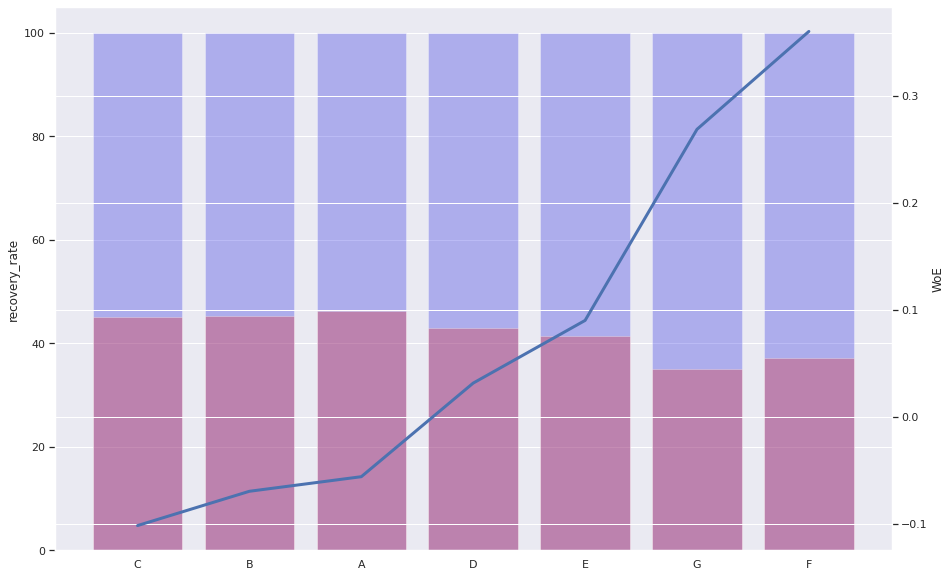

In [26]:
df_grade = woe_categorical_lgd(categorical_features_lgd, 'grade', categorical_features_lgd['recovery_rate'] , label_angel = 90)
df_grade

In [27]:
categorical_features_lgd['grade'] = categorical_features_lgd['grade'].replace({'B' : 'A'}, regex=True)

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,MORTGAGE,19147,0.557267,0.442849,10670.0,8477.0,0.437815,0.449351,-0.026006,NaN,NaN
1,OWN,3785,0.564069,0.087543,2135.0,1650.0,0.087604,0.087464,0.001606,0.006801,0.027612
2,RENT,20258,0.569257,0.468545,11532.0,8726.0,0.473185,0.462550,0.022733,0.005188,0.021127
3,OTHER,38,0.710526,0.000879,27.0,11.0,0.001108,0.000583,0.641856,0.141270,0.619123
4,NONE,8,0.875000,0.000185,7.0,1.0,0.000287,0.000053,1.689825,0.164474,1.047969


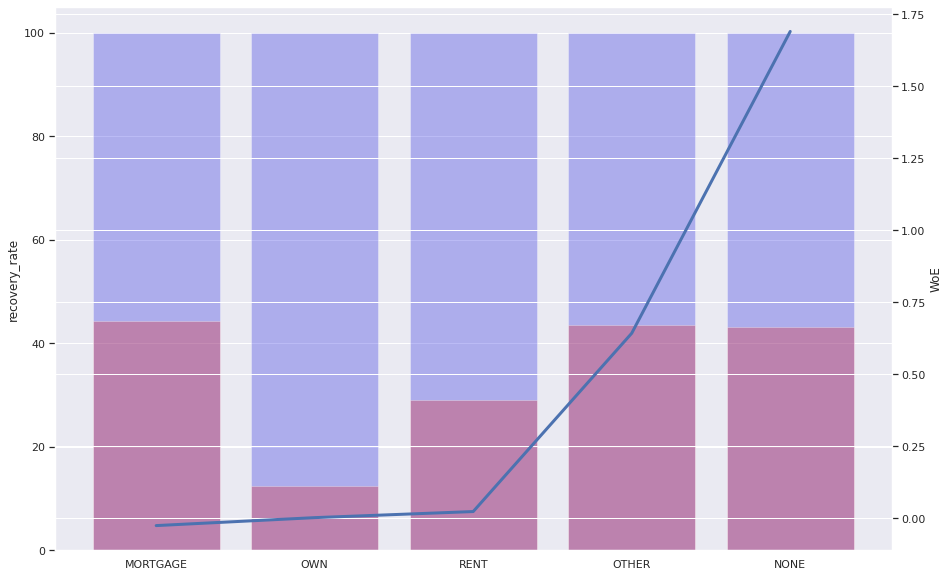

In [28]:
df_grade = woe_categorical_lgd(categorical_features_lgd, 'home_ownership', categorical_features_lgd['recovery_rate'] , label_angel = 90)
df_grade

In [29]:
categorical_features_lgd['home_ownership'] = categorical_features_lgd['home_ownership'].replace({'MORTGAGE' :\
                                                                            'OWN', 'RENT':'OWN'}, regex=True)

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,Source Verified,12642,0.526815,0.292395,6660.0,5982.0,0.273276,0.317095,-0.148721,NaN,NaN
1,Not Verified,12135,0.564400,0.280669,6849.0,5286.0,0.281031,0.280201,0.002955,0.037585,0.151676
2,Verified,18459,0.588439,0.426936,10862.0,7597.0,0.445694,0.402703,0.101431,0.024039,0.098476


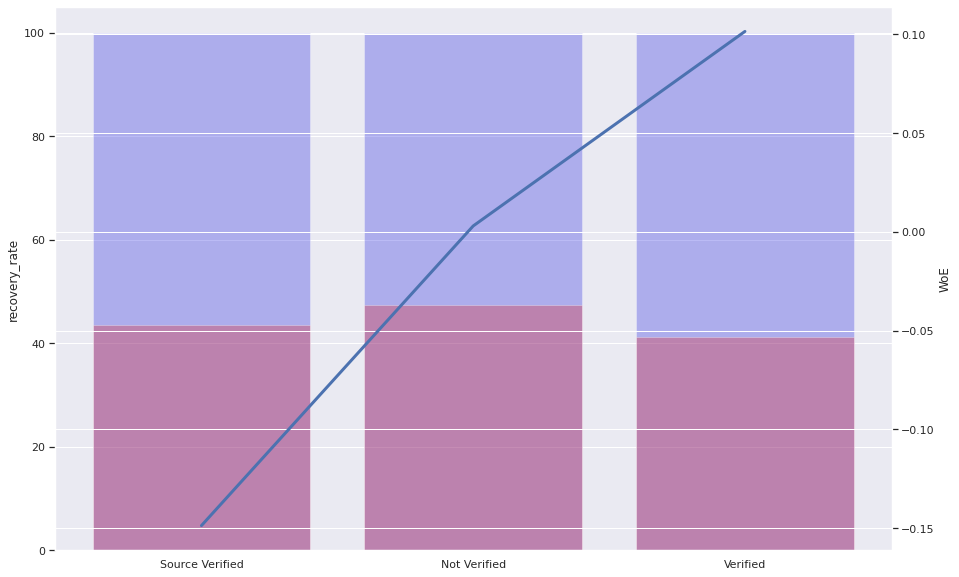

In [30]:
df_grade = woe_categorical_lgd(categorical_features_lgd, 'verification_status', categorical_features_lgd['recovery_rate'] , label_angel = 90)
df_grade

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,credit_card,7449,0.517653,0.172287,3856.0,3593.0,0.158221,0.190459,-0.185443,NaN,NaN
1,debt_consolidation,26127,0.551728,0.604288,14415.0,11712.0,0.591482,0.620832,-0.048430,0.034075,0.137013
2,medical,545,0.576147,0.012605,314.0,231.0,0.012884,0.012245,0.050890,0.024419,0.099320
3,home_improvement,2197,0.591261,0.050814,1299.0,898.0,0.053301,0.047601,0.113094,0.015114,0.062205
4,vacation,259,0.598456,0.005990,155.0,104.0,0.006360,0.005513,0.142949,0.007195,0.029854
5,moving,408,0.605392,0.009437,247.0,161.0,0.010135,0.008534,0.171898,0.006937,0.028950
6,other,2892,0.614799,0.066889,1778.0,1114.0,0.072956,0.059051,0.211446,0.009407,0.039548
7,major_purchase,831,0.646209,0.019220,537.0,294.0,0.022034,0.015584,0.346333,0.031410,0.134886
8,car,438,0.673516,0.010130,295.0,143.0,0.012105,0.007580,0.468045,0.027307,0.121712
9,house,278,0.690647,0.006430,192.0,86.0,0.007878,0.004559,0.547063,0.017132,0.079017


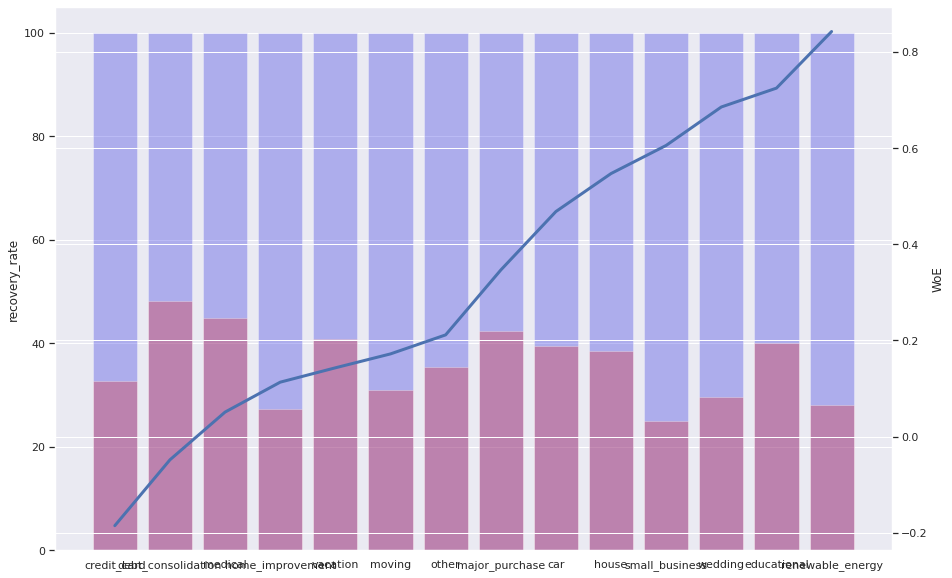

In [31]:
df_grade = woe_categorical_lgd(categorical_features_lgd, 'purpose', categorical_features_lgd['recovery_rate'] , label_angel = 90)
df_grade

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,ID,1,0.000000,0.000023,0.0,1.0,0.000000,0.000053,-inf,NaN,NaN
1,MS,79,0.354430,0.001827,28.0,51.0,0.001149,0.002703,-0.855707,0.354430,inf
2,VT,68,0.441176,0.001573,30.0,38.0,0.001231,0.002014,-0.492474,0.086746,3.632323e-01
3,TN,528,0.452652,0.012212,239.0,289.0,0.009807,0.015319,-0.446049,0.011475,4.642564e-02
4,WV,152,0.453947,0.003516,69.0,83.0,0.002831,0.004400,-0.440820,0.001296,5.229033e-03
5,CT,590,0.467797,0.013646,276.0,314.0,0.011325,0.016645,-0.385078,0.013849,5.574198e-02
6,MN,754,0.474801,0.017439,358.0,396.0,0.014690,0.020991,-0.356967,0.007004,2.811090e-02
7,WI,510,0.476471,0.011796,243.0,267.0,0.009971,0.014153,-0.350273,0.001670,6.694010e-03
8,OR,521,0.485605,0.012050,253.0,268.0,0.010381,0.014206,-0.313683,0.009134,3.658972e-02
9,IN,576,0.491319,0.013322,283.0,293.0,0.011612,0.015531,-0.290811,0.005715,2.287178e-02


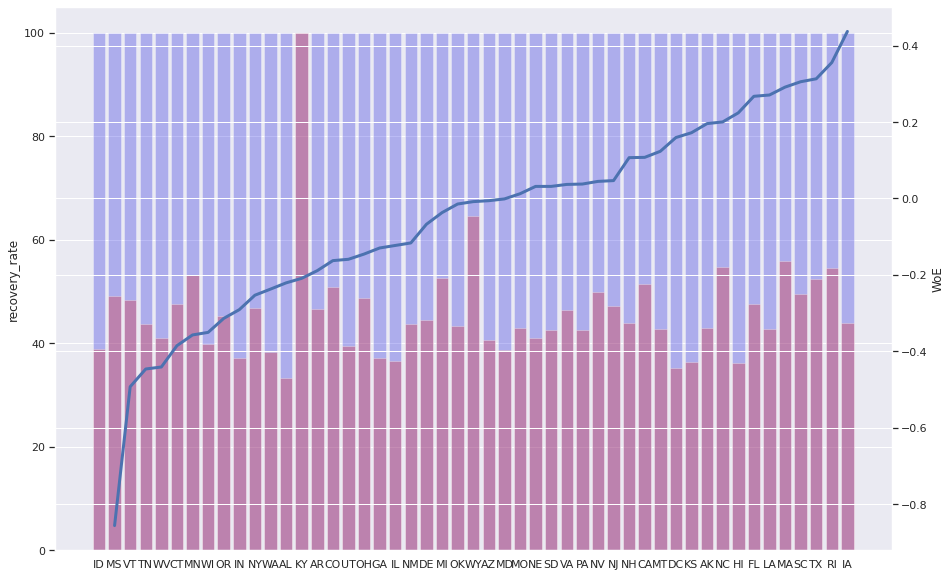

In [32]:
df_grade = woe_categorical_lgd(categorical_features_lgd, 'addr_state', categorical_features_lgd['recovery_rate'] , label_angel = 90)
df_grade

In [33]:
categorical_features_lgd['addr_state'] = categorical_features_lgd['addr_state'].replace({'NV' :\
                                              'NJ', 'PA':'NJ', 'VA':'NJ', 'SD':'NJ', 'NC':'NK','SC':'TX'}, regex=True)

categorical_features_lgd['addr_state'] = categorical_features_lgd['addr_state'].replace({'IL' :\
                                                                   'NM', 'GA':'NM', 'LA':'FL', 'NE':'NJ'}, regex=True)

categorical_features_lgd['addr_state'] = categorical_features_lgd['addr_state'].replace({'TN' :\
                                                    'WV' , 'WY':'AZ', 'NH':'CA', 'CO':'UT', 'NK':'AK', 'AZ':'MD'}, regex=True)

categorical_features_lgd['addr_state'] = categorical_features_lgd['addr_state'].replace({'ID' :\
                                                    'MS',}, regex=True)
categorical_features_lgd['addr_state'] = categorical_features_lgd['addr_state'].replace({'MS' :\
                                                    'VT',}, regex=True)
categorical_features_lgd['addr_state'] = categorical_features_lgd['addr_state'].replace({'MT' :\
                                                    'DC',}, regex=True)
categorical_features_lgd['addr_state'] = categorical_features_lgd['addr_state'].replace({'RI' :\
                                                    'IA',}, regex=True)
categorical_features_lgd['addr_state'] = categorical_features_lgd['addr_state'].replace({'HI' :\
                                                    'IA',}, regex=True)
categorical_features_lgd['addr_state'] = categorical_features_lgd['addr_state'].replace({'DC' :\
                                                    'IA',}, regex=True)
categorical_features_lgd['addr_state'] = categorical_features_lgd['addr_state'].replace({'KS' :\
                                                    'OK',}, regex=True)
categorical_features_lgd['addr_state'] = categorical_features_lgd['addr_state'].replace({'DE' :\
                                                    'AR',}, regex=True)
categorical_features_lgd['addr_state'] = categorical_features_lgd['addr_state'].replace({'VT' :\
                                                    'OR',}, regex=True)
categorical_features_lgd['addr_state'] = categorical_features_lgd['addr_state'].replace({'AR' :\
                                                    'KY',}, regex=True)
categorical_features_lgd['addr_state'] = categorical_features_lgd['addr_state'].replace({'MN' :\
                                                    'WI',}, regex=True)


,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,w,11142,0.357745,0.257702,3986.0,7156.0,0.163555,0.379327,-0.841248,NaN,NaN
1,f,32094,0.635165,0.742298,20385.0,11709.0,0.836445,0.620673,0.298356,0.27742,1.139605


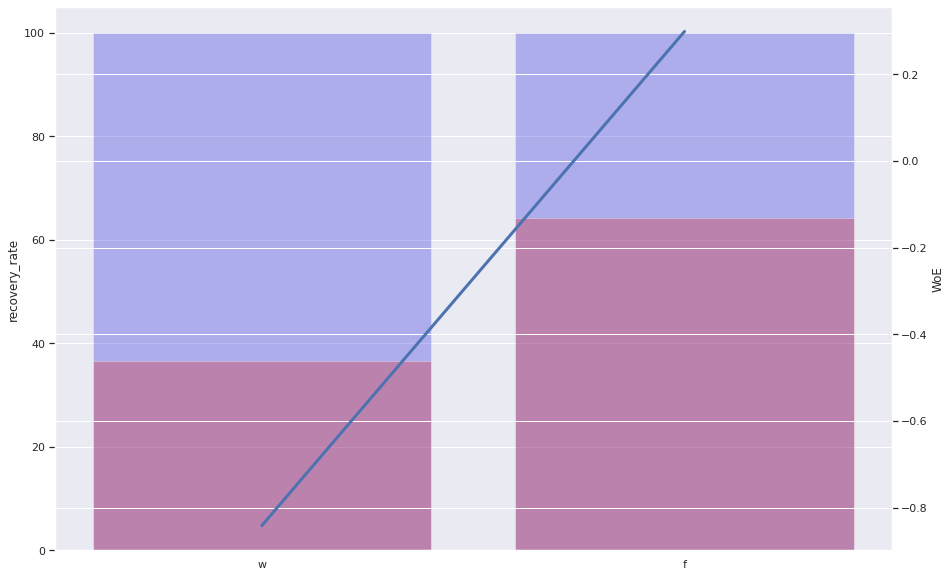

In [34]:
df_grade = woe_categorical_lgd(categorical_features_lgd, 'initial_list_status', categorical_features_lgd['recovery_rate'] , label_angel = 90)
df_grade

In [35]:
categorical_features_lgd

,grade,home_ownership,verification_status,loan_status,pymnt_plan,purpose,addr_state,initial_list_status,application_type,recovery_rate
1,C,OWN,Source Verified,Charged Off,n,car,NM,f,INDIVIDUAL,1
8,F,OWN,Source Verified,Charged Off,n,small_business,CA,f,INDIVIDUAL,1
9,A,OWN,Verified,Charged Off,n,other,TX,f,INDIVIDUAL,1
12,C,OWN,Source Verified,Charged Off,n,debt_consolidation,NJ,f,INDIVIDUAL,1
14,A,OWN,Source Verified,Charged Off,n,other,CA,f,INDIVIDUAL,1
...,...,...,...,...,...,...,...,...,...,...
466254,E,OWN,Source Verified,Charged Off,n,medical,NM,f,INDIVIDUAL,0
466256,D,OWN,Source Verified,Charged Off,n,debt_consolidation,NJ,f,INDIVIDUAL,0
466276,D,OWN,Verified,Charged Off,n,medical,MA,f,INDIVIDUAL,1
466277,A,OWN,Verified,Charged Off,n,debt_consolidation,MD,f,INDIVIDUAL,0


In [40]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors = []

    for predictor in CategoricalVariablesList:
        CrossTabResult = pd.crosstab(index = inpData[TargetVariable], columns = inpData[predictor])
        ChiSqResult    = chi2_contingency(CrossTabResult)
        
        if (ChiSqResult[1] < 0.05):
            print('The {:20} is \t correlated with target variable and the calculated P-value is {:12.4f}'.format(predictor,ChiSqResult[1] ))
            SelectedPredictors.append(predictor)
        else:
            print('The {:20} is NOT  correlated with target variable and the calculated P-value is {:12.4f}'.format(predictor,ChiSqResult[1] ))            
    return(SelectedPredictors)

In [42]:
# Calling the function to check which categorical variables are correlated with target
CategoricalVariablesList = categorical_features_lgd.columns.tolist()

FunctionChisq(inpData = categorical_features_lgd, TargetVariable='recovery_rate', \
                                                            CategoricalVariablesList = CategoricalVariablesList)

The grade                is 	 correlated with target variable and the calculated P-value is       0.0000
The home_ownership       is 	 correlated with target variable and the calculated P-value is       0.0390
The verification_status  is 	 correlated with target variable and the calculated P-value is       0.0000
The loan_status          is 	 correlated with target variable and the calculated P-value is       0.0000
The pymnt_plan           is NOT  correlated with target variable and the calculated P-value is       1.0000
The purpose              is 	 correlated with target variable and the calculated P-value is       0.0000
The addr_state           is 	 correlated with target variable and the calculated P-value is       0.0000
The initial_list_status  is 	 correlated with target variable and the calculated P-value is       0.0000
The application_type     is NOT  correlated with target variable and the calculated P-value is       1.0000
The recovery_rate        is 	 correlated with tar

['grade',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'addr_state',
 'initial_list_status',
 'recovery_rate']

In [46]:
categorical_features_lgd = categorical_features_lgd[['grade', 'home_ownership', 'verification_status',
                         'loan_status', 'purpose', 'addr_state', 'initial_list_status', 'recovery_rate']]
categorical_features_lgd

,grade,home_ownership,verification_status,loan_status,purpose,addr_state,initial_list_status,recovery_rate
1,C,OWN,Source Verified,Charged Off,car,NM,f,1
8,F,OWN,Source Verified,Charged Off,small_business,CA,f,1
9,A,OWN,Verified,Charged Off,other,TX,f,1
12,C,OWN,Source Verified,Charged Off,debt_consolidation,NJ,f,1
14,A,OWN,Source Verified,Charged Off,other,CA,f,1
...,...,...,...,...,...,...,...,...
466254,E,OWN,Source Verified,Charged Off,medical,NM,f,0
466256,D,OWN,Source Verified,Charged Off,debt_consolidation,NJ,f,0
466276,D,OWN,Verified,Charged Off,medical,MA,f,1
466277,A,OWN,Verified,Charged Off,debt_consolidation,MD,f,0


In [36]:
import statsmodels.api as sm
def stepwise_selection(X, y, 
                           initial_list=[], 
                           threshold_in=0.01, 
                           threshold_out = 0.05, 
                           verbose=True):
        """ Perform a forward-backward feature selection 
        based on p-value from statsmodels.api.OLS
        Arguments:
            X - pandas.DataFrame with candidate features
            y - list-like with the target
            initial_list - list of features to start with (column names of X)
            threshold_in - include a feature if its p-value < threshold_in
            threshold_out - exclude a feature if its p-value > threshold_out
            verbose - whether to print the sequence of inclusions and exclusions
        Returns: list of selected features 
        Always set threshold_in < threshold_out to avoid infinite looping.
        See https://en.wikipedia.org/wiki/Stepwise_regression for the details
        """
        included = list(initial_list)
        while True:
            changed=False
            # forward step
            excluded = list(set(X.columns)-set(included))
            new_pval = pd.Series(index=excluded)
            for new_column in excluded:
                model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
                new_pval[new_column] = model.pvalues[new_column]
            best_pval = new_pval.min()
            if best_pval < threshold_in:
                best_feature = new_pval.idxmin()
                included.append(best_feature)
                changed=True
                if verbose:
                    print('Add  {:30} with p-value {:.6f}'.format(best_feature, best_pval))

            # backward step
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
            # use all coefs except intercept
            pvalues = model.pvalues.iloc[1:]
            worst_pval = pvalues.max() # null if pvalues is empty
            if worst_pval > threshold_out:
                changed=True
                worst_feature = pvalues.idxmax()
                included.remove(worst_feature)
                if verbose:
                    print('Drop {:30} with p-value {:.6f}'.format(worst_feature, worst_pval))
            if not changed:
                break
        return included

In [47]:
#Data_lgd = pd.concat([Data_lgd[categorical_features_lgd.columns.tolist()], Data_lgd['recovery_rate']], axis = 1)
y_LGD = categorical_features_lgd['recovery_rate']
X_LGD = pd.get_dummies(categorical_features_lgd.drop('recovery_rate', axis = 1))
print('y_LGD shape is{} '.format(y_LGD.shape))
print('X_LGD shape is {}'.format(X_LGD.shape))


y_LGD shape is(43236,) 
X_LGD shape is (43236, 54)


In [48]:
result = stepwise_selection(X_LGD, y_LGD,initial_list=[],  threshold_in=0.01,  threshold_out = 0.05,  verbose=True)
print('resulting features:')
print(result)

Add  initial_list_status_w          with p-value 0.000000
Add  grade_F                        with p-value 0.000000
Add  addr_state_TX                  with p-value 0.000000
Add  addr_state_FL                  with p-value 0.000000
Add  purpose_small_business         with p-value 0.000000
Add  addr_state_NY                  with p-value 0.000000
Add  verification_status_Verified   with p-value 0.000000
Add  purpose_credit_card            with p-value 0.000000
Add  purpose_debt_consolidation     with p-value 0.000000
Add  addr_state_CA                  with p-value 0.000000
Add  initial_list_status_f          with p-value 0.000000
Add  addr_state_MA                  with p-value 0.000000
Add  addr_state_AK                  with p-value 0.000000
Drop initial_list_status_w          with p-value 0.531374
Add  initial_list_status_w          with p-value 0.000000
Add  addr_state_NJ                  with p-value 0.000000
Add  grade_E                        with p-value 0.000003
Add  grade_D  

In [49]:
#SF = SLCTD_FEATURES.sort_values(by = 'rank').head(num_of_features*2).iloc[0:num_of_features]['name']
SF = result
X_LGD = X_LGD[SF]
X_LGD

,grade_F,addr_state_TX,addr_state_FL,purpose_small_business,addr_state_NY,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,addr_state_CA,initial_list_status_f,...,grade_D,addr_state_IA,grade_G,addr_state_OK,addr_state_MD,verification_status_Not Verified,verification_status_Source Verified,addr_state_CT,addr_state_OR,addr_state_WI
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
8,1,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
9,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
14,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466254,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
466256,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,0,1,0,0,0
466276,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
466277,0,0,0,0,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0


In [50]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

X_lgd_train, X_lgd_test, y_lgd_train, y_lgd_test = train_test_split(X_LGD, y_LGD,test_size = 0.2)
print('X_lgd_train shape is {}'.format(X_lgd_train.shape))
print('y_lgd_train shape is {}'.format(y_lgd_train.shape))

X_lgd_train shape is (34588, 24)
y_lgd_train shape is (34588,)


In [51]:
#dealing with imbalance data
os = RandomOverSampler()
X_train_o, y_train_o = os.fit_resample(np.array(X_lgd_train), np.array(y_lgd_train))
y_train_series = pd.Series(y_train_o)

In [52]:
X_lgd_train

,grade_F,addr_state_TX,addr_state_FL,purpose_small_business,addr_state_NY,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,addr_state_CA,initial_list_status_f,...,grade_D,addr_state_IA,grade_G,addr_state_OK,addr_state_MD,verification_status_Not Verified,verification_status_Source Verified,addr_state_CT,addr_state_OR,addr_state_WI
121350,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
417520,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
125622,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
798,0,0,0,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
164581,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293290,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
117821,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
215490,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
198745,0,1,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [55]:
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression

In [57]:
#building model
model = LogisticRegression()
model.fit(X_lgd_train, y_lgd_train)

LogisticRegression()

In [59]:
#predicting
y_preds = model.predict(X_lgd_test)

In [60]:
#importing libraries for model training
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, \
                                                                         precision_recall_curve

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

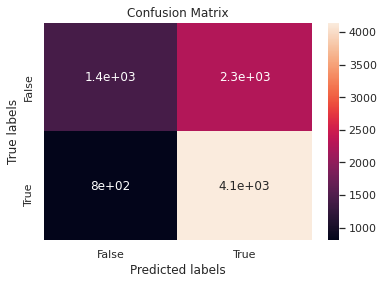

In [61]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, )
cm = confusion_matrix(y_lgd_test,y_preds)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

In [62]:
#classification report
print(classification_report(y_lgd_test,y_preds))

              precision    recall  f1-score   support

           0       0.64      0.39      0.48      3702
           1       0.65      0.84      0.73      4946

    accuracy                           0.64      8648
   macro avg       0.64      0.61      0.60      8648
weighted avg       0.64      0.64      0.62      8648



In [63]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithmd
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(model, X_LGD,y_LGD, cv = 10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.43768226 0.62799653 0.58369471 0.59759372 0.50331551 0.60812432
 0.74595005 0.7918647  0.56480031 0.52690718]

Final Average Accuracy of the model: 0.6
